In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Z-Score Scalling

In [ ]:
df = pd.DataFrame({'h' : [150, 60, 170, 180, 190],
                   'w' : [50, 60, 70, 80, 90]})


mean = df.mean()
std = df.std()

z = (df - mean) / std

print(round(z, 2))

      h     w
0  0.00 -1.26
1 -1.72 -0.63
2  0.38  0.00
3  0.57  0.63
4  0.76  1.26


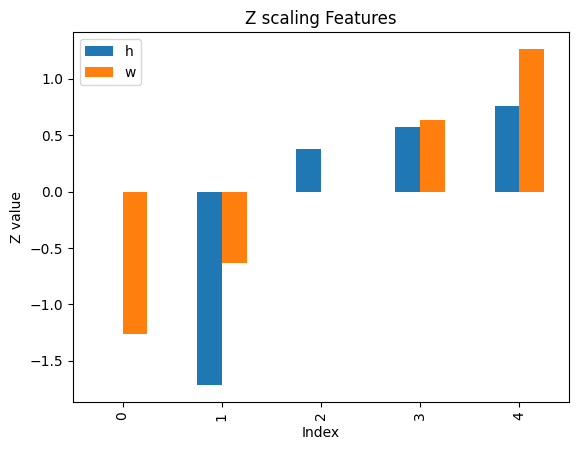

In [ ]:
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index")
plt.ylabel("Z value")

plt.show()

###Min Max Scalling

In [ ]:
df = pd.DataFrame({'h' : [150, 175, 170, 180, 190],
                   'w' : [50, 60, 70, 180, 90]})


min = df.min()
max = df.max()

mm = (df-min) / (max-min)

print(round(mm, 2))

      h     w
0  0.00  0.00
1  0.62  0.08
2  0.50  0.15
3  0.75  1.00
4  1.00  0.31


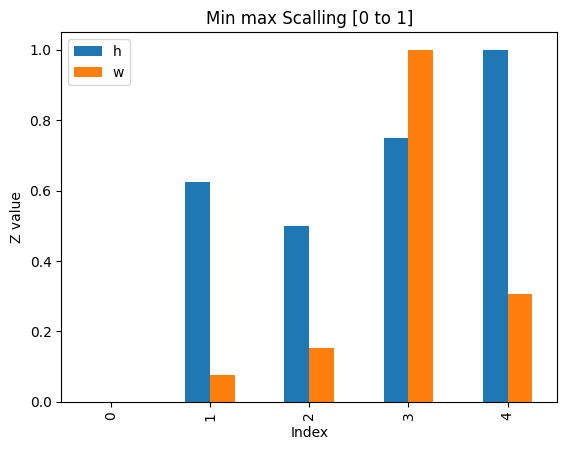

In [ ]:
mm.plot(kind='bar')
plt.title("Min max Scalling [0 to 1]")
plt.xlabel("Index")
plt.ylabel("Z value")

plt.show()

###Robust Scalling

In [ ]:
df = pd.DataFrame({'h' : [150, 175, 170, 180, 190],
                   'w' : [50, 60, 70, 80, 90]})


median = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 -q1

rs = (df - median) / IQR

print(round(rs, 2))

     h    w
0 -2.5 -1.0
1  0.0 -0.5
2 -0.5  0.0
3  0.5  0.5
4  1.5  1.0


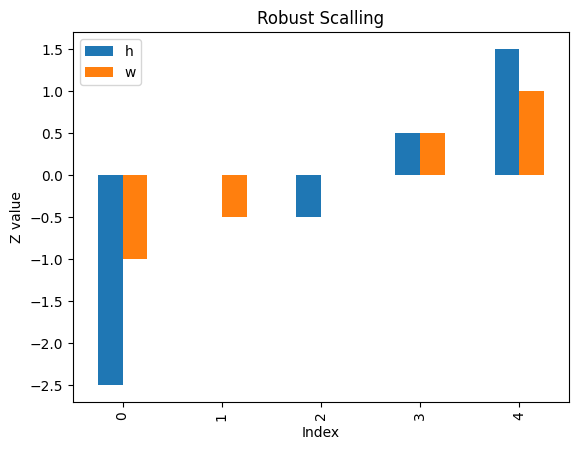

In [ ]:
rs.plot(kind='bar')
plt.title("Robust Scalling")
plt.xlabel("Index")
plt.ylabel("Z value")

plt.show()

In [ ]:
out = pd.concat([df,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 rs.add_prefix('rs_')], axis=1)

out

,h,w,z_h,z_w,mm_h,mm_w,rs_h,rs_w
0,150,50,0.000000,-1.264911,0.000,0.000000,-2.5,-1.0
1,175,60,-1.716233,-0.632456,0.625,0.076923,0.0,-0.5
2,170,70,0.381385,0.000000,0.500,0.153846,-0.5,0.0
3,180,80,0.572078,0.632456,0.750,1.000000,0.5,0.5
4,190,90,0.762770,1.264911,1.000,0.307692,1.5,1.0


###One hot Encoding

In [ ]:
import pandas as pd

df = pd.DataFrame({"id" : [1, 2, 3, 4],
                   "color" : ["red", "blue", "green", "red"],
                   "size" : ["small", "medium", "large", "medium"],
                   "price" : [10, 12, 15, 11]})

In [ ]:
d_color = pd.get_dummies(df['color'], prefix='color', dtype=int)

df_encode = pd.concat([df, d_color], axis=1)

df_encode = df_encode.drop(['color'], axis=1)

df_encode
# d_color

,id,size,price,color_blue,color_green,color_red
0,1,small,10,0,0,1
1,2,medium,12,1,0,0
2,3,large,15,0,1,0
3,4,medium,11,0,0,1


###Ordinal Encoding

In [ ]:
import pandas as pd

df = pd.DataFrame({"id" : [1, 2, 3, 4],
                   "color" : ["red", "blue", "green", "red"],
                   "size" : ["small", "medium", "large", "medium"],
                   "price" : [10, 12, 15, 11]})

In [ ]:
order = {"small" : 1, "medium" : 2, "large" : 3}

# df['size_encoding'] = df['size'].map(order).astype(int)
df['size'] = df['size'].map(order).astype(int)

df

,id,color,size,price,size_encoding
0,1,red,1,10,1
1,2,blue,2,12,2
2,3,green,3,15,3
3,4,red,2,11,2
